<a href="https://colab.research.google.com/github/tanya58/Leaf-Disease-Detection/blob/main/cotton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")

In [ ]:

print("Tensorflow-version:", tensorflow.__version__)

Tensorflow-version: 2.15.0


In [ ]:
model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(256, 256, 3))

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x)
x= Dense(512,activation='relu')(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(4,activation='softmax')(x) #FC-layer

29084464/29084464 [==============================] - 2s 0us/step


In [ ]:
model=Model(inputs=model_d.input,outputs=preds)
#model.summary()

In [ ]:
for layer in model.layers[:-8]:
    layer.trainable=False

for layer in model.layers[-8:]:
    layer.trainable=True

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
#model.summary()

In [ ]:
trdata = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

tsdata = ImageDataGenerator(rescale = 1./255)
traindata = trdata.flow_from_directory(directory="/content/drive/MyDrive/Ram/archive (3)/Cotton Disease/train",target_size=(256,256),batch_size = 32,
                                                 class_mode = 'categorical')
testdata = tsdata.flow_from_directory(directory="/content/drive/MyDrive/Ram/archive (3)/Cotton Disease/test", target_size=(256,256),batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("densenet.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

history = model.fit_generator( traindata,validation_data=testdata,epochs=20,callbacks=[checkpoint,early])

Epoch 1/20
61/61 [==============================] - ETA: 0s - loss: 0.1345 - accuracy: 0.9508

61/61 [==============================] - 57s 842ms/step - loss: 0.1345 - accuracy: 0.9508 - val_loss: 0.1647 - val_accuracy: 0.9528
Epoch 2/20
61/61 [==============================] - ETA: 0s - loss: 0.1219 - accuracy: 0.9569

61/61 [==============================] - 47s 765ms/step - loss: 0.1219 - accuracy: 0.9569 - val_loss: 0.1033 - val_accuracy: 0.9623
Epoch 3/20
61/61 [==============================] - ETA: 0s - loss: 0.1283 - accuracy: 0.9518

61/61 [==============================] - 43s 710ms/step - loss: 0.1283 - accuracy: 0.9518 - val_loss: 0.1216 - val_accuracy: 0.9623
Epoch 4/20
61/61 [==============================] - ETA: 0s - loss: 0.1374 - accuracy: 0.9539

61/61 [==============================] - 43s 711ms/step - loss: 0.1374 - accuracy: 0.9539 - val_loss: 0.0618 - val_accuracy: 0.9717
Epoch 5/20
61/61 [==============================] - ETA: 0s - loss: 0.1117 - accuracy: 0.9595

61/61 [==============================] - 43s 702ms/step - loss: 0.1117 - accuracy: 0.9595 - val_loss: 0.0895 - val_accuracy: 0.9717
Epoch 6/20
61/61 [==============================] - ETA: 0s - loss: 0.1057 - accuracy: 0.9610

61/61 [==============================] - 44s 714ms/step - loss: 0.1057 - accuracy: 0.9610 - val_loss: 0.0824 - val_accuracy: 0.9717
Epoch 7/20
61/61 [==============================] - ETA: 0s - loss: 0.1185 - accuracy: 0.9564

61/61 [==============================] - 43s 702ms/step - loss: 0.1185 - accuracy: 0.9564 - val_loss: 0.0811 - val_accuracy: 0.9717
Epoch 8/20
61/61 [==============================] - ETA: 0s - loss: 0.1056 - accuracy: 0.9621

61/61 [==============================] - 43s 701ms/step - loss: 0.1056 - accuracy: 0.9621 - val_loss: 0.1054 - val_accuracy: 0.9623
Epoch 9/20
61/61 [==============================] - ETA: 0s - loss: 0.1249 - accuracy: 0.9569

61/61 [==============================] - 43s 698ms/step - loss: 0.1249 - accuracy: 0.9569 - val_loss: 0.0883 - val_accuracy: 0.9528
Epoch 10/20
61/61 [==============================] - ETA: 0s - loss: 0.1125 - accuracy: 0.9544

61/61 [==============================] - 44s 729ms/step - loss: 0.1125 - accuracy: 0.9544 - val_loss: 0.0552 - val_accuracy: 0.9811
Epoch 11/20
61/61 [==============================] - ETA: 0s - loss: 0.1337 - accuracy: 0.9528

61/61 [==============================] - 42s 691ms/step - loss: 0.1337 - accuracy: 0.9528 - val_loss: 0.0474 - val_accuracy: 0.9811
Epoch 12/20
61/61 [==============================] - ETA: 0s - loss: 0.1118 - accuracy: 0.9621

61/61 [==============================] - 43s 703ms/step - loss: 0.1118 - accuracy: 0.9621 - val_loss: 0.0604 - val_accuracy: 0.9811
Epoch 13/20
61/61 [==============================] - ETA: 0s - loss: 0.1234 - accuracy: 0.9590

61/61 [==============================] - 43s 697ms/step - loss: 0.1234 - accuracy: 0.9590 - val_loss: 0.0490 - val_accuracy: 0.9811
Epoch 14/20
61/61 [==============================] - ETA: 0s - loss: 0.1045 - accuracy: 0.9605

61/61 [==============================] - 42s 693ms/step - loss: 0.1045 - accuracy: 0.9605 - val_loss: 0.1131 - val_accuracy: 0.9623
Epoch 15/20
61/61 [==============================] - ETA: 0s - loss: 0.1052 - accuracy: 0.9636

61/61 [==============================] - 43s 712ms/step - loss: 0.1052 - accuracy: 0.9636 - val_loss: 0.0560 - val_accuracy: 0.9811
Epoch 16/20
61/61 [==============================] - ETA: 0s - loss: 0.1013 - accuracy: 0.9631

61/61 [==============================] - 43s 698ms/step - loss: 0.1013 - accuracy: 0.9631 - val_loss: 0.0508 - val_accuracy: 0.9811
Epoch 17/20
61/61 [==============================] - ETA: 0s - loss: 0.1054 - accuracy: 0.9636

61/61 [==============================] - 42s 691ms/step - loss: 0.1054 - accuracy: 0.9636 - val_loss: 0.0462 - val_accuracy: 0.9906
Epoch 18/20
61/61 [==============================] - ETA: 0s - loss: 0.1201 - accuracy: 0.9564

61/61 [==============================] - 43s 698ms/step - loss: 0.1201 - accuracy: 0.9564 - val_loss: 0.0553 - val_accuracy: 0.9717
Epoch 19/20
61/61 [==============================] - ETA: 0s - loss: 0.1229 - accuracy: 0.9600

61/61 [==============================] - 43s 693ms/step - loss: 0.1229 - accuracy: 0.9600 - val_loss: 0.0315 - val_accuracy: 0.9906
Epoch 20/20
61/61 [==============================] - ETA: 0s - loss: 0.0989 - accuracy: 0.9585

61/61 [==============================] - 43s 706ms/step - loss: 0.0989 - accuracy: 0.9585 - val_loss: 0.0394 - val_accuracy: 0.9717


In [ ]:
accuracy = model.evaluate(testdata)

print('Test set accuracy:', accuracy[1]*100)

4/4 [==============================] - 2s 471ms/step - loss: 0.0935 - accuracy: 0.9717
Test set accuracy: 97.16981053352356


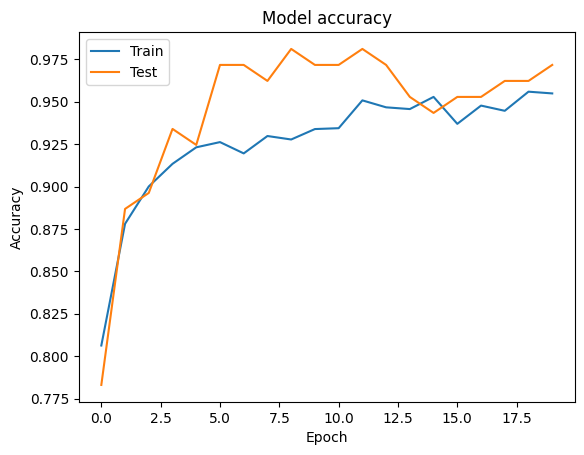

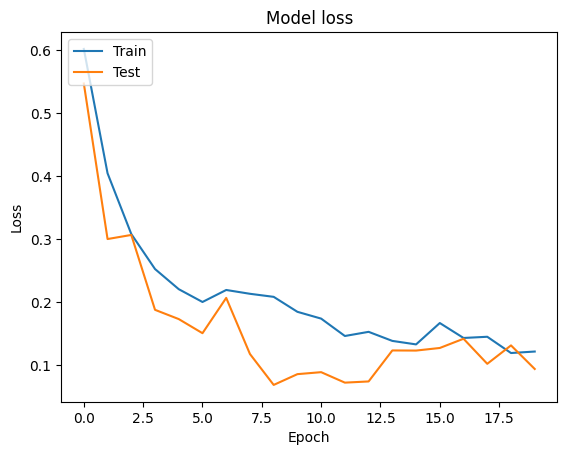

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from keras.models import load_model

model = load_model("/content/densenet.h5")

In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Ram/content/densenet.h5')